# SVM

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from joblib import dump, load

In [2]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [3]:
from preprocessing import reemplazarNulls,reemplazarCategoricas,reemplazarFechas,targetBooleano,regularizar

[###] All Done                                              


In [4]:
from utilities import score, df_feat, df_targ, train_val

### Codigo a correr

In [5]:
MAX_ITER = 10**6
MAX_JOBS = -1

**Run :** Entrenar Nuevamente o Cargar Entrenado

In [6]:
runLinearSimple = False
runLinear = False
runPoly = False
runRadial = False

**Save :** Guardar Modelo (pisa anterior)

In [7]:
saveLinear= True
saveLinearSimple= True
savePoly = True
saveRadial = True

### Preprocesamiento

In [8]:
targetBooleano(df_targ, inplace=True)
reemplazarNulls(df_feat , inplace=True)
reemplazarCategoricas(df_feat , inplace=True)
reemplazarFechas(df_feat , inplace=True)
regularizar(df_feat , inplace=True)

,id,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,mm_lluvia_dia,nubosidad_tarde,presion_atmosferica_tarde,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,velocidad_viendo_tarde
0,0.495844,0.736537,0.645996,-2.018030,1.277923,0.270523,7.914307,0.916539,1.269394,0.802215,0.589120,0.834079
1,0.183431,0.317434,-1.382279,-2.018030,-1.806334,-0.675093,0.417359,-1.288420,-2.406972,0.393094,1.544505,1.402051
2,-0.113001,-0.730326,-0.570969,-1.330311,1.326115,-1.147901,-0.281713,1.284033,-2.094694,-0.834272,1.250541,1.629239
3,-1.678190,1.574745,0.848823,-2.018030,1.952605,1.426276,0.320935,1.284033,0.020281,-1.447954,1.030067,1.402051
4,0.930508,-1.149430,-1.179451,-2.018030,-1.806334,-1.673244,-0.281713,-0.920927,-1.257220,-0.834272,0.736103,0.038918
...,...,...,...,...,...,...,...,...,...,...,...,...
102351,-0.264327,-0.101670,-0.570969,-0.298733,0.555051,-1.305504,-0.233501,0.549046,-0.490719,-0.834272,2.352908,2.083617
102352,-1.317418,0.946089,1.457306,-1.462565,0.651434,0.585729,0.345041,0.916539,0.318365,1.211337,0.589120,1.402051
102353,-1.594150,0.736537,1.660133,-2.018030,1.422498,-0.359888,-0.281713,0.916539,-0.064885,-1.447954,-0.366265,-1.892186
102354,0.293898,-1.149430,-0.773796,-1.779974,1.326115,-0.202285,-0.281713,1.284033,-2.052110,-0.629711,1.177050,0.606890


In [9]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102356 entries, 0 to 102355
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           102356 non-null  float64
 1   direccion_viento_tarde       102356 non-null  float64
 2   direccion_viento_temprano    102356 non-null  float64
 3   horas_de_sol                 102356 non-null  float64
 4   humedad_tarde                102356 non-null  float64
 5   humedad_temprano             102356 non-null  float64
 6   mm_lluvia_dia                102356 non-null  float64
 7   nubosidad_tarde              102356 non-null  float64
 8   presion_atmosferica_tarde    102356 non-null  float64
 9   rafaga_viento_max_direccion  102356 non-null  float64
 10  rafaga_viento_max_velocidad  102356 non-null  float64
 11  velocidad_viendo_tarde       102356 non-null  float64
dtypes: float64(12)
memory usage: 9.4 MB


In [10]:
train_feat, val_feat, train_targ, val_targ = train_val( df_feat, df_targ )
train_targ=train_targ.llovieron_hamburguesas_al_dia_siguiente
val_targ=val_targ.llovieron_hamburguesas_al_dia_siguiente

## Entrenamiento

### Lineal

#### Simple

In [11]:
if (runLinearSimple):
    svm_simple_lineal = SVC(
        kernel='linear', C=0.1,
        max_iter=MAX_ITER, shrinking=False, verbose = 1, probability=True,
    )
    svm_simple_lineal.fit( train_feat, train_targ )
    
    # Guardar
    if(saveLinearSimple):
        dump(svm_simple_lineal, 'models/SVM/svm_simple_lineal.sk') 
else:
    # Cargar
    svm_simple_lineal = load('models/SVM/svm_simple_lineal.sk')

In [12]:
%%time
linsim_pred = svm_simple_lineal.predict(val_feat)
linsim_prob = svm_simple_lineal.predict_proba(val_feat)
score(val_targ,linsim_pred, linsim_prob)

ValueError: y should be a 1d array, got an array of shape (10236, 2) instead.

#### Optimizando Hiperparametros

In [13]:
base_arrange = np.arange(0.01, 0.09, 0.03)
hipr_arrange = np.concatenate((base_arrange,base_arrange*10,base_arrange*100),axis=None)
hipr_arrange

array([0.01, 0.04, 0.07, 0.1 , 0.4 , 0.7 , 1.  , 4.  , 7.  ])

In [14]:
if (runLinear):
    svm_lineal = SVC(
        kernel='linear',
        max_iter=MAX_ITER, shrinking=False, probability=True,
    )
    params = {'C': hipr_arrange}
    
    svm_lineal_grid = HalvingGridSearchCV(
        svm_lineal,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=2, cv=2,
    ).fit(train_feat, train_targ)
    
    # Guardar
    if(saveLinear):
        dump(svm_lineal_grid, 'models/SVM/svm_lineal_grid.sk')
        dump(svm_lineal_grid.best_estimator_, 'models/SVM/svm_lineal.sk')
else:
    # Cargar
    svm_lineal_grid = load('models/SVM/svm_lineal_grid.sk')

In [15]:
print(f"Best score: {svm_lineal_grid.best_score_}")
print(f"Best params {svm_lineal_grid.best_params_}")

Best score: 0.8529030220197755
Best params {'C': 0.01}


In [16]:
svm_lineal = svm_lineal_grid.best_estimator_

AUC-ROC: 0.8475897900346991
ACCURACY: 0.8345056662758891
PRESICION: 0.7339089481946625
RECALL: 0.40829694323144106
CONFUSION MATRIX
CPU times: user 13.3 s, sys: 0 ns, total: 13.3 s
Wall time: 13.2 s


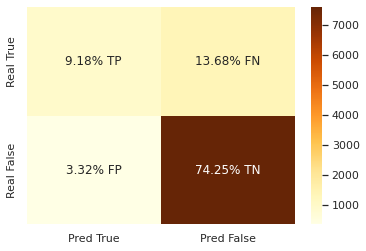

In [17]:
%%time
lin_pred = svm_lineal.predict(val_feat)
lin_prob = svm_lineal.predict_proba(val_feat)
score(val_targ, lin_pred, lin_prob[:,1])

### Poly

In [18]:
if (runPoly):
    svm_poly = SVC(
        kernel='poly',
        max_iter=MAX_ITER*10, shrinking=False, probability=True,
    )
    params = {
        'C': hipr_arrange*10,
        'degree': np.arange(1,5,1),
        'gamma': hipr_arrange,
        'coef0': hipr_arrange*10,
    }
    
    svm_poly_grid = HalvingGridSearchCV(
        svm_poly,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1, cv=2,
    ).fit(train_feat, train_targ)
    
    # Guardar
    if(savePoly):
        dump(svm_poly_grid, 'models/SVM/svm_poly_grid.sk')
        dump(svm_poly_grid.best_estimator_, 'models/SVM/svm_poly.sk')
else:
    # Cargar
    svm_poly_grid = load('models/SVM/svm_poly_grid.sk')

In [19]:
print(f"Best score: {svm_poly_grid.best_score_}")
print(f"Best params {svm_poly_grid.best_params_}")

Best score: 0.8558912625135552
Best params {'C': 0.1, 'coef0': 4.0, 'degree': 2, 'gamma': 0.01}


In [20]:
svm_poly = svm_poly_grid.best_estimator_

AUC-ROC: 0.8510315261200878
ACCURACY: 0.8354826103946854
PRESICION: 0.7550505050505051
RECALL: 0.39170305676855893
CONFUSION MATRIX
CPU times: user 16 s, sys: 8.09 ms, total: 16 s
Wall time: 15.9 s


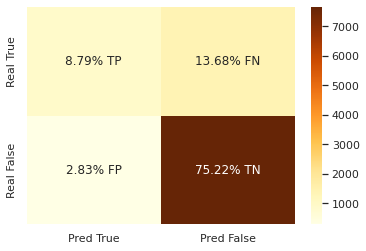

In [21]:
%%time
pol_pred = svm_poly.predict(val_feat)
pol_prob = svm_poly.predict_proba(val_feat)
score(val_targ, pol_pred, pol_prob[:,1])

### Radial

In [22]:
if (runRadial):
    svm_radial = SVC(
        kernel='rbf',
        max_iter=MAX_ITER, shrinking=False, probability=True,
    )
    params = {
        'C': hipr_arrange,
        'gamma': hipr_arrange,
    }
    
    svm_radial_grid = HalvingGridSearchCV(
        svm_radial,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1, cv=2,
    ).fit(train_feat, train_targ)
    
    # Guardar
    if(saveRadial):
        dump(svm_radial_grid, 'models/SVM/svm_radial_grid.sk')
        dump(svm_radial_grid.best_estimator_, 'models/SVM/svm_radial.sk')
else:
    # Cargar
    svm_radial_grid = load('models/SVM/svm_radial_grid.sk')

In [23]:
print(f"Best score: {svm_radial_grid.best_score_}")
print(f"Best params {svm_radial_grid.best_params_}")

Best score: 0.8543185190818388
Best params {'C': 0.1, 'gamma': 0.01}


In [24]:
svm_radial = svm_radial_grid.best_estimator_

AUC-ROC: 0.8465118809606769
ACCURACY: 0.8349941383352872
PRESICION: 0.7592752372735116
RECALL: 0.38427947598253276
CONFUSION MATRIX
CPU times: user 30 s, sys: 18.1 ms, total: 30 s
Wall time: 30 s


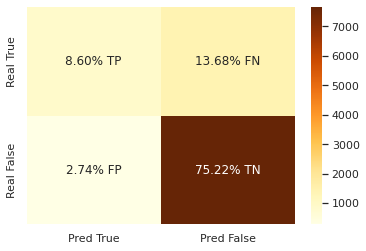

In [25]:
%%time
rad_pred = svm_radial.predict(val_feat)
rad_prob = svm_radial.predict_proba(val_feat)
score(val_targ, rad_pred, rad_prob[:,1])

## Resultados

#### Lineal

Best score: 0.8529030220197755 \
Best params {'C': 0.01}

Wall time: 13 s \
AUC-ROC: 0.8475897900346991 \
ACCURACY: 0.8345056662758891 \
PRESICION: 0.7339089481946625 \
RECALL: 0.40829694323144106

#### Polinomial

Best score: 0.8558912625135552 \
Best params {'C': 0.1, 'coef0': 4.0, 'degree': 2, 'gamma': 0.01}

Wall time: 15.1 s \
AUC-ROC: 0.8510315261200878 \
ACCURACY: 0.8354826103946854 \
PRESICION: 0.7550505050505051 \
RECALL: 0.39170305676855893

#### Radial

Best score: 0.8543185190818388 \
Best params {'C': 0.1, 'gamma': 0.01}

Wall time: 30.1 s \
AUC-ROC: 0.8465118809606769 \
ACCURACY: 0.8349941383352872 \
PRESICION: 0.7592752372735116 \
RECALL: 0.38427947598253276